In [1]:
#Bibliotecas
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

##Generar un archivo PKL
import pickle 

In [ ]:
#Funciones

'''Abrir un archivo h5'''

# SPK

In [50]:
#path de windows

path_file = "E:\\T_proyect\\20230622\\datamanager\\Rebanada02\\"
namefile = "OPTOa20230622s02_SPK.h5"


file = h5py.File(path_file+namefile)

In [26]:
dir(file['Data']['Recording_0']['SegmentStream']['Stream_0'])

['_MutableMapping__marker',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_d',
 '_e',
 '_gcpl_crt_order',
 '_id',
 '_ipython_key_completions_',
 '_lapl',
 '_lcpl',
 'attrs',
 'build_virtual_dataset',
 'clear',
 'copy',
 'create_dataset',
 'create_dataset_like',
 'create_group',
 'create_virtual_dataset',
 'file',
 'get',
 'id',
 'items',
 'keys',
 'move',
 'name',
 'parent',
 'pop',
 'popitem',
 'ref',
 'regionref',
 'requir

In [34]:
print(file['Data']['Recording_0']['SegmentStream']['Stream_0']['SegmentData_0'])

<HDF5 dataset "SegmentData_0": shape (31, 136), type "<i4">


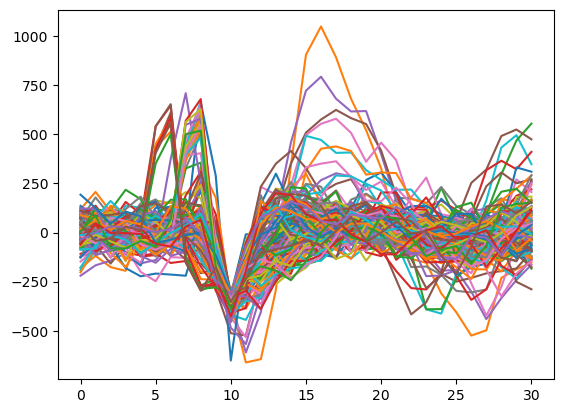

In [47]:
segments = np.array(file['Data']['Recording_0']['SegmentStream']['Stream_0']['SegmentData_0'])
plt.plot(segments)
plt.show()

# RAW

In [49]:

path_file = "E:\\T_proyect\\20230622\\datamanager\\Rebanada02\\"
namefile = "OPTOa20230622s02_RAW.h5"


file_raw = h5py.File(path_file+namefile)

In [66]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0'].keys()

<KeysViewHDF5 ['ChannelData', 'ChannelDataTimeStamps', 'InfoChannel']>

In [57]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData']

<HDF5 dataset "ChannelData": shape (120, 6000000), type "<i4">

In [71]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][1][0:100]

array([ -64, -128,  -87,   -9,   30,   18,   36,   28,  -50,  -34,   61,
        104,   79,   26,   -7,  -43,  -55,  -75,  -88,   -6,   42,   46,
        -38,  -66,   70,   55,  -17,  -15,  -15,   27,   61,   34,    3,
          8,   10,   14,   97,  147,   34,  -72,  -41,   11,  -53,  -73,
         29,   64,   25,   11,   34,   45,    4,   -6,   31,   14,  -17,
         10,   -6,  -36,  -38,  -45,  -26,   -9,   15,   22,   11,  -14,
        -48,  -36,   10,   69,   70,    5,    1,   68,   23,  -89,  -76,
         10,   66,  -37,  -93,   20,   -4,  -17,   46,    2,   -3,   -7,
        -56,  -15,   20,    2,   -5,  -38,    0,   64,   49,    4,  -82,
        -46])

In [60]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelDataTimeStamps']

<HDF5 dataset "ChannelDataTimeStamps": shape (1, 3), type "<i8">

In [65]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelDataTimeStamps'][0]

array([      0,       0, 5999999], dtype=int64)

In [69]:
file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel'][1]

(1, 1, 0, 0, b'F8', b'Int', b'V', -12, 0, 100, 59605, 24, b'', b'-1', -1, b'', b'-1', -1)

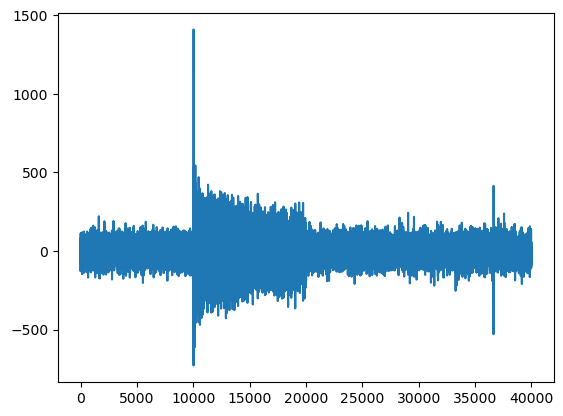

In [74]:
data_plot=np.array(file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][1][80000:120000])
plt.plot(data_plot)

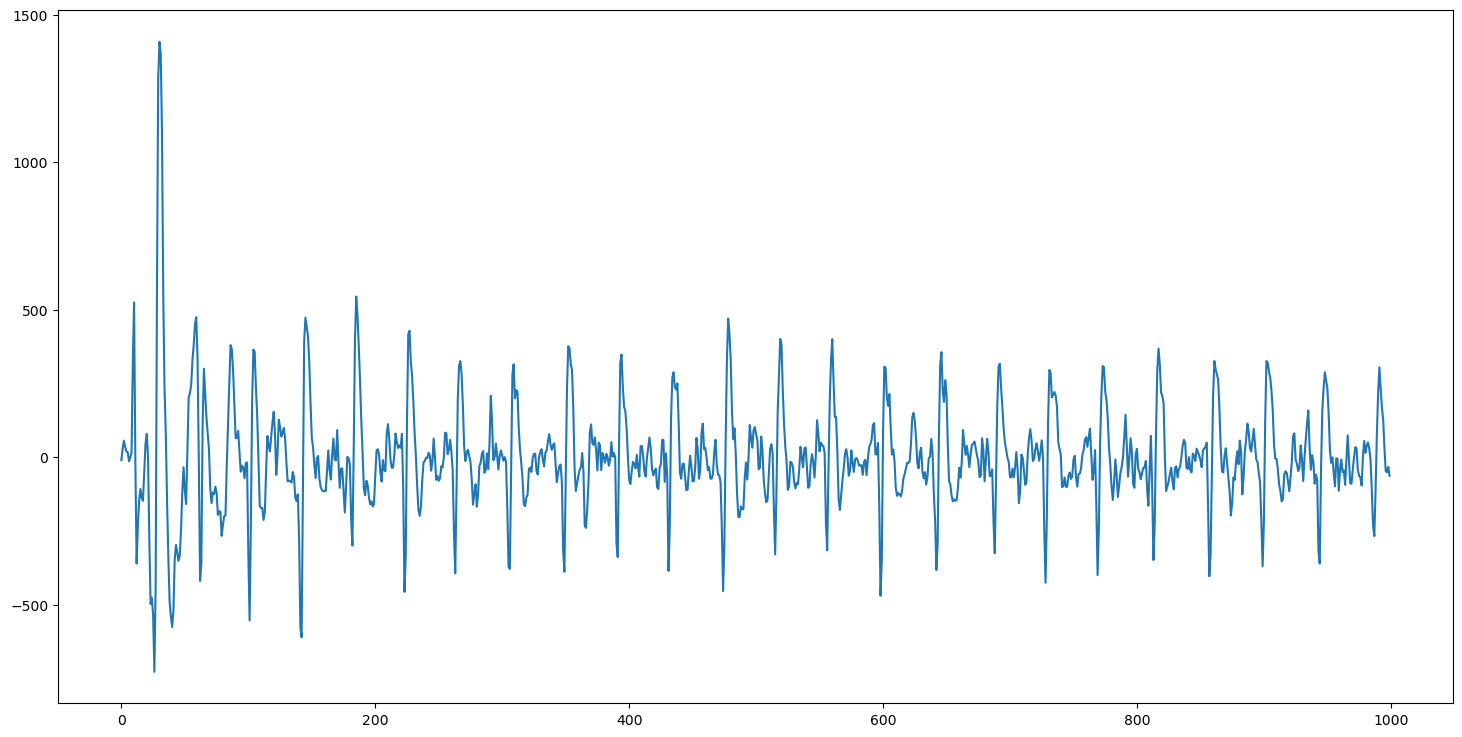

In [79]:
plt.figure(figsize=(18,9))
plt.plot(data_plot[10000:11000])

# L6 Analysis

In [84]:

path_file = "E:\\T_proyect\\20230622\\datamanager\\Rebanada02\\"
namefile = "L6.h5"


file_L6 = h5py.File(path_file+namefile)
plot_l6 = np.array(file_L6['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][0])

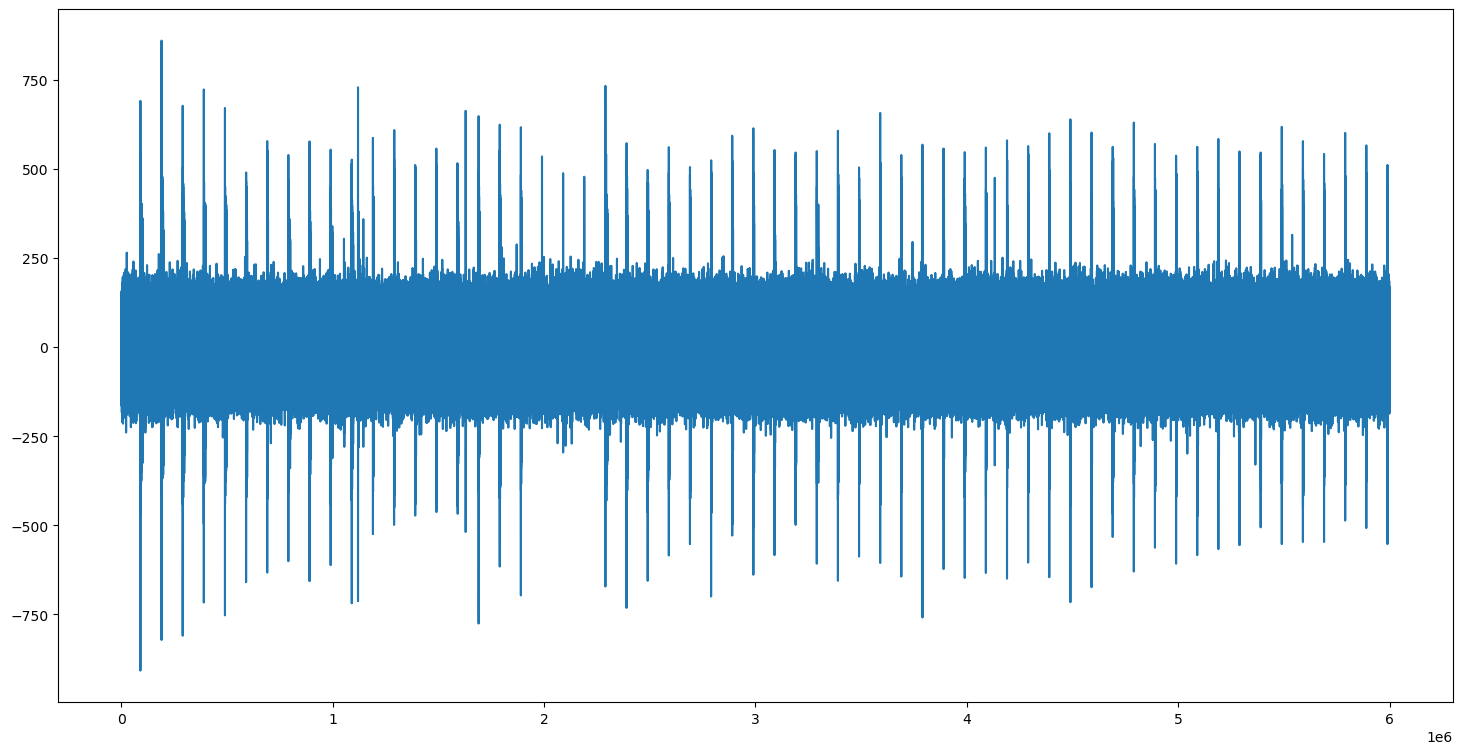

In [86]:
plt.figure(figsize=(18,9))
plt.plot(plot_l6)
plt.show()